# Ejemplo Sistema Bombas Serie
_Gustavo Raush, 2019, UPC-MF_

Bombas en serie permiten alcanzar alturas piezométrica no conseguibles con bombas individuales.

Para los cálculos de pérdidas por fricción considerar un $f = 0.02$.

In [64]:
from math import pi
from math import *
from scipy.constants import g
from scipy.optimize import fsolve
from numpy import mean
from numpy import arange
from numpy import array
from numpy import linspace
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
plt.figure(num=None, figsize=(18, 16), dpi=80, facecolor='w', edgecolor='k')

<Figure size 1440x1280 with 0 Axes>

<Figure size 1440x1280 with 0 Axes>

In [65]:
def _area(d):
    return pi*0.25*d**2
 
def _diam(Q,L,H,f=0.02):
    return pow(8*f*L*Q**2/((pi**2)*g*H),1./5.)
 
def _req(d,l,f=0.02):
    return 8*f*l/(pi**2 * g * d**5)
 
def _Re(Q=1,D=0.1,nu=1e-6):
    return float('{:.0f}'.format(4*Q/(pi*nu*D)))
 
def _leq(k,d,f=0.02):
    return k*d/f
 
def Q_from_H(H,rh):
    return sqrt(H/rh)
 
def f_From_Moody(Re=1.e6,er=0.0001): # Diagrama de Moody
    if Re < 2300:
        return 64./Re
    elif ((Re >= 2300) and (Re < 4000)):
        return "Transition Zone"
    else:
        f_initial_guess = 0.02
        x_initial_guess = 1/sqrt(f_initial_guess)
        func = lambda x : x + 2*log10(er/3.71 + 2.51*x/Re)
        x_sol = fsolve(func,x_initial_guess)
        return 1/x_sol[0]**2

### Datos del ejemplo

Ecuaciones de las bombas B1 y B2

In [66]:
Hb1 = lambda q : Hmax1 * (1 - (q/Qmax1)**2) if q<Qmax1 else 0
Hb2 = lambda q : Hmax2 * (1 - (q/Qmax2)**2) if q<Qmax2 else 0

In [67]:
Hmax1 = 25
Hmax2 = 30
Qmax1 = 0.3
Qmax2 = 0.5

In [68]:
Hb1(0.15)

18.75

In [69]:
q = linspace(0,0.5,20)
hb1 = []
for a in q:
    hb1.append(Hb1(a))


In [70]:
hb1 = []
hb2 = []
hbSerie = []
for a in q:
    hb1.append(Hb1(a))
    hb2.append(Hb2(a))
    hbSerie.append(Hb1(a)+Hb2(a))

In [79]:
plt.figure(num=None, figsize=(2, 3), dpi=80, facecolor='w', edgecolor='k')

<Figure size 160x240 with 0 Axes>

<Figure size 160x240 with 0 Axes>

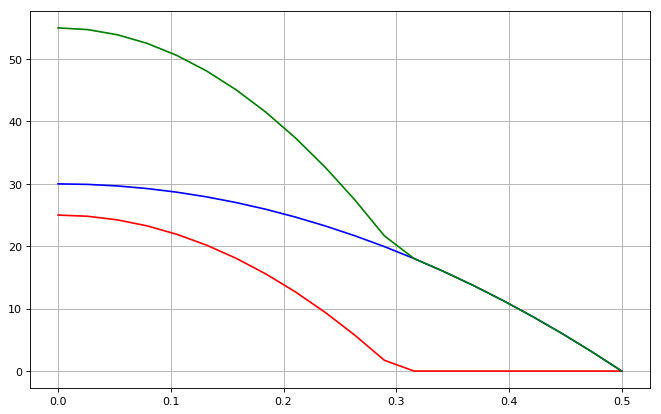

In [89]:
plt.figure(num=None, figsize=(10, 6.25), dpi=80, facecolor='w', edgecolor='k')
plt.plot(q,hb1,'r',q,hb2,'b',q,hbSerie,'g')
plt.grid()
plt.show()

In [72]:
Hsys = lambda q : H + req*q*q
H = 40
req = 100
hsys = []
for a in q:
    hsys.append(Hsys(a))

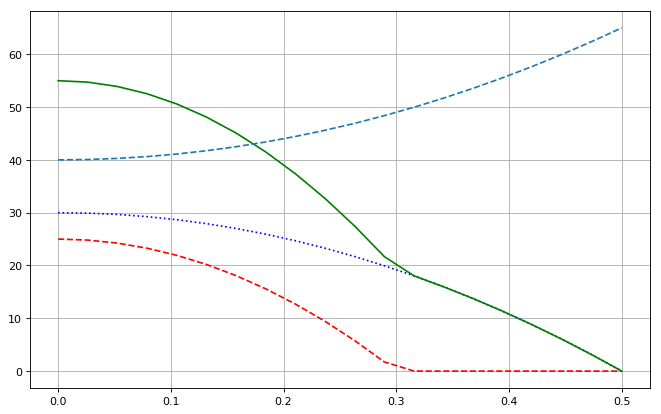

In [93]:
plt.figure(num=None, figsize=(10, 6.25), dpi=80, facecolor='w', edgecolor='k')
plt.plot(q,hb1,'r--',q,hb2,'b:',q,hbSerie,'g',q,hsys,'--')
plt.grid()
plt.show()

In [62]:
fsolve(lambda x : Hsys(x)-(Hb1(x)+Hb2(x)),0.15)

array([0.17359127])

In [23]:
for q in linspace(0,0.5,10):
    print Hb1(q)

25.0
24.142661179698216
21.570644718792867
17.28395061728395
11.28257887517147
3.5665294924554143
0
0
0
0
